In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

(400, 2) (400, 1)


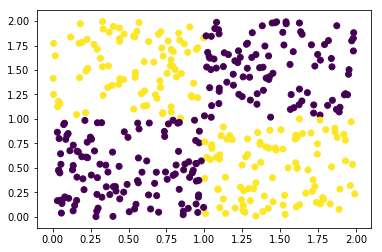

In [2]:
T = 1.
F = 0.

xxx = np.array([[F, F],
      [F, T],
      [T, F],
      [T, T],])
yyy = np.array([[F],[T],[T],[F]])

x = []
y = []
n_data = 400
for i in range(n_data):
    index = np.random.randint(low=0, high=4)
    xx = xxx[index] + np.random.uniform(low=0., high=1, size=xxx[0].size)
#     xx = xxx[index] + np.random.normal(loc=0., scale=0.21, size=xxx[0].size)
    x.append(xx)
    y.append(yyy[index])
x, y = np.array(x), np.array(y)
xx, yy = torch.FloatTensor(x), torch.FloatTensor(y)
print(x.shape, y.shape)
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1))

In [11]:
## defining the model
class TanhClassification(nn.Module):
    
    def __init__(self, n_hidden=4):
        super().__init__()
        self.fcp1 = nn.Linear(2, n_hidden)
        self.actf = nn.Tanh()
        self.sigmoid = nn.Sigmoid()
    
        
    def forward(self,x):
        p = self.fcp1(x)
        p = self.actf(p)
#         r = torch.ones_like(r)

        ########## Use any of the following methods###########

        ## method 1 ##
        ## Must use tanh activation for variation of input in +ve, -ve domain
        out = (p).sum(dim=1).reshape(-1,1)
        
        ## method 3 ##
#         out = self.fcr2(p*r)
    
        out = self.sigmoid(out)
        return out
    
model = TanhClassification(n_hidden=20)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# optimizer = torch.optim.SGD(model.parameters(), lr=1)
criterion = nn.BCELoss()

In [12]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

EPOCHS = 100000
for step in range(EPOCHS):

    yout = model(xx)
#     print(yout)
    loss = criterion(yout, yy)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss.data)

        ax.clear()
        plt.scatter(x[:,0], x[:, 1], c=yout.data.numpy().reshape(-1))       
        fig.canvas.draw()
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss tensor(1.8737)

_______________________
epoch 100
Loss tensor(0.5231)

_______________________
epoch 200
Loss tensor(0.3995)

_______________________
epoch 300
Loss tensor(0.3311)

_______________________
epoch 400
Loss tensor(0.2906)

_______________________
epoch 500
Loss tensor(0.2637)

_______________________
epoch 600
Loss tensor(0.2438)

_______________________
epoch 700
Loss tensor(0.2278)

_______________________
epoch 800
Loss tensor(0.2142)

_______________________
epoch 900
Loss tensor(0.2024)

_______________________
epoch 1000
Loss tensor(0.1920)

_______________________
epoch 1100
Loss tensor(0.1828)

_______________________
epoch 1200
Loss tensor(0.1746)

_______________________
epoch 1300
Loss tensor(0.1674)

_______________________
epoch 1400
Loss tensor(0.1610)

_______________________
epoch 1500
Loss tensor(0.1553)

_______________________
epoch 1600
Loss tensor(0.1503)

_______________________
epoch 1700
Loss tensor(0.1459)

____


_______________________
epoch 14700
Loss tensor(0.0516)

_______________________
epoch 14800
Loss tensor(0.0514)

_______________________
epoch 14900
Loss tensor(0.0512)

_______________________
epoch 15000
Loss tensor(0.0510)

_______________________
epoch 15100
Loss tensor(0.0508)

_______________________
epoch 15200
Loss tensor(0.0507)

_______________________
epoch 15300
Loss tensor(0.0505)

_______________________
epoch 15400
Loss tensor(0.0503)

_______________________
epoch 15500
Loss tensor(0.0501)

_______________________
epoch 15600
Loss tensor(0.0499)

_______________________
epoch 15700
Loss tensor(0.0497)

_______________________
epoch 15800
Loss tensor(0.0495)

_______________________
epoch 15900
Loss tensor(0.0494)

_______________________
epoch 16000
Loss tensor(0.0492)

_______________________
epoch 16100
Loss tensor(0.0490)

_______________________
epoch 16200
Loss tensor(0.0488)

_______________________
epoch 16300
Loss tensor(0.0487)

_______________________
epoch 


_______________________
epoch 29100
Loss tensor(0.0404)

_______________________
epoch 29200
Loss tensor(0.0404)

_______________________
epoch 29300
Loss tensor(0.0403)

_______________________
epoch 29400
Loss tensor(0.0403)


TclError: invalid command name "pyimage50"

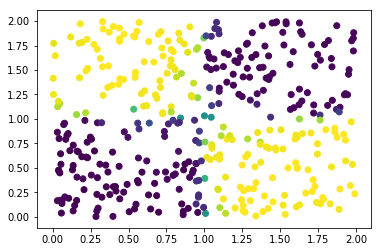

In [13]:
%matplotlib inline
plt.scatter(x[:,0], x[:, 1], c=yout.data.numpy().reshape(-1)) 

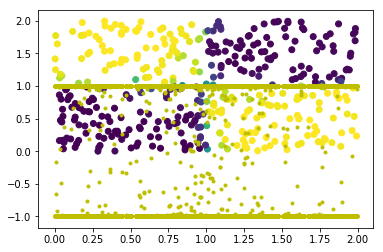

In [15]:
p = model.fcp1(xx)
p = model.actf(p)
out = (p).sum(dim=1).reshape(-1,1)

plt.scatter(x[:,0], x[:, 1], c=yout.data.numpy().reshape(-1)) 
for prb in p.data.numpy().T:
    plt.scatter(x[:,0], prb, marker='.', c='y')

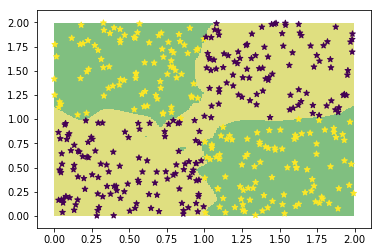

In [16]:
import matplotlib
h = 0.01
x_, y_ = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), h), np.arange(x[:,1].min(), x[:,1].max(), h))
xx_img = np.c_[x_.ravel(), y_.ravel()]
xx_img = torch.FloatTensor(xx_img)
yout_img = model(xx_img)
out = (yout_img.data.numpy()>0.5).astype(int)

colors = ['r', 'y', 'g', 'b']
plt.imshow(out.reshape(x_.shape), interpolation='nearest',
           extent=(x_.min(), x_.max(), y_.min(), y_.max()),
           cmap=matplotlib.colors.ListedColormap(colors[1:-1]),
           alpha=0.5,
           aspect='auto', origin='lower')

plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')